# Performing Exploratory Data Analysis on Terrorism

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [57]:
data = pd.read_csv("/home/webtunix/Downloads/globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
data.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [59]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)


In [60]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [61]:
data.head()


,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [62]:
data.shape


(181691, 18)

In [63]:
data.isnull().sum()


Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10234
Wound          18992
target1          641
summary        66129
Group            445
Targettype        23
Weapon            72
motive        131451
dtype: int64

In [64]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)


In [66]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        181691 non-null  object 
 11  Wound       181691 non-null  object 
 12  target1     181050 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181246 non-null  object 
 15  Targettype  181668 non-null  object 
 16  Weapon      181619 non-null  object 
 17  motive      50240 non-null   object 
dtypes: float64(2), int64(3), object(13)
memory u

In [67]:
data.describe()


,Year,Month,day,latitude,longitude
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02


<AxesSubplot:>

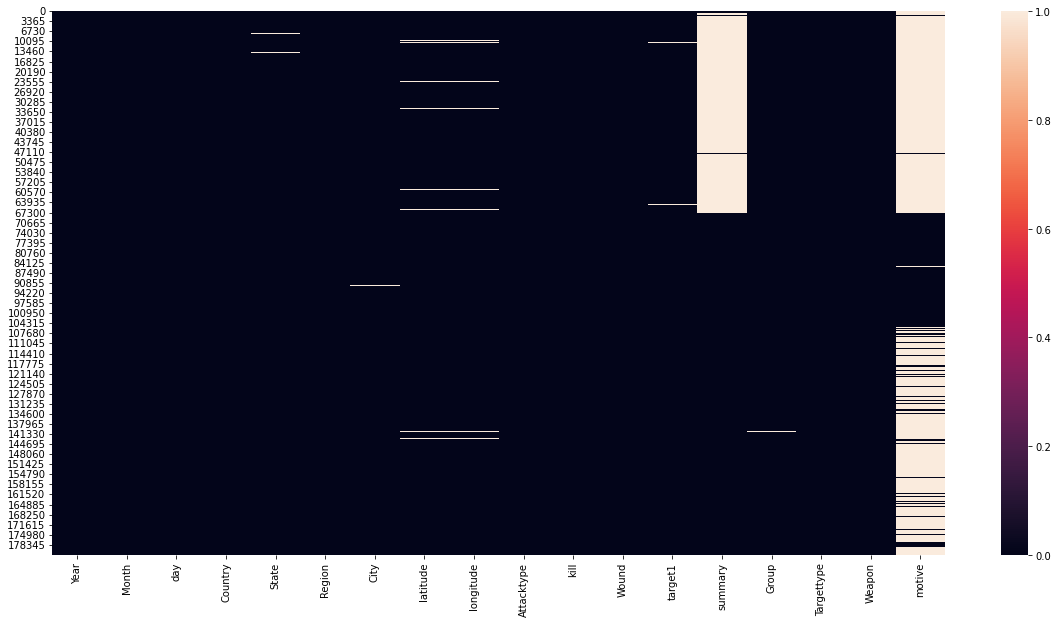

In [92]:
plt.figure(figsize = (20,10))
sns.heatmap(data.isnull())


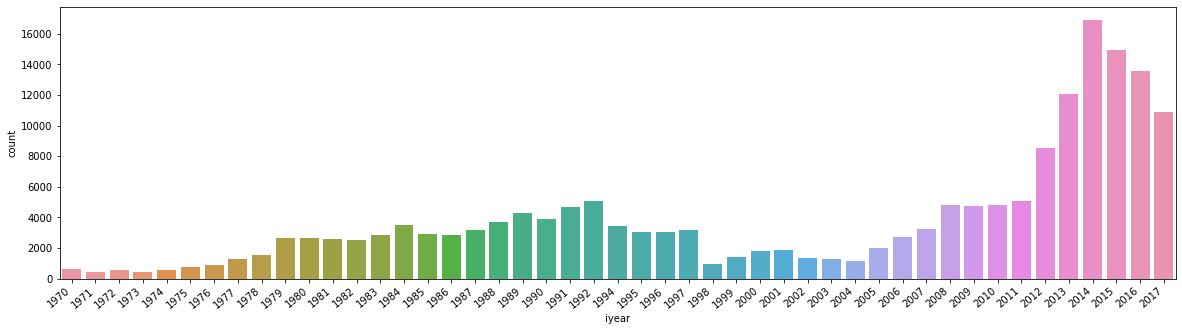

In [93]:
plt.figure(figsize=(20,5)) 
ax = sns.countplot(terror['iyear'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

<AxesSubplot:>

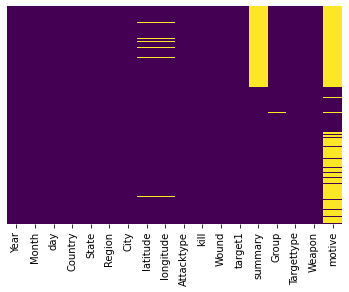

In [88]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


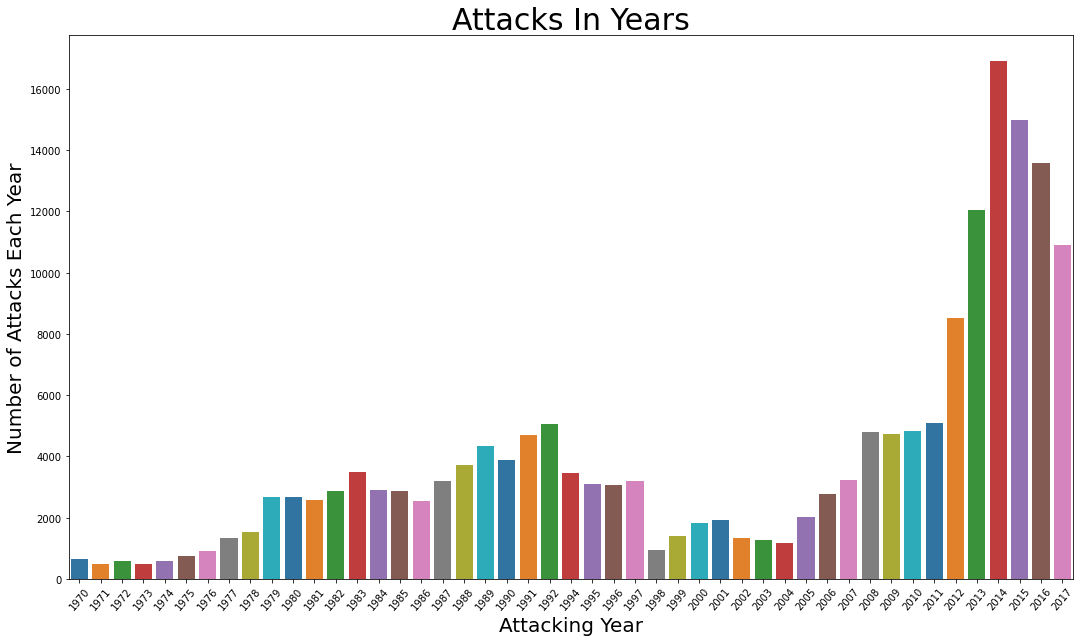

In [68]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

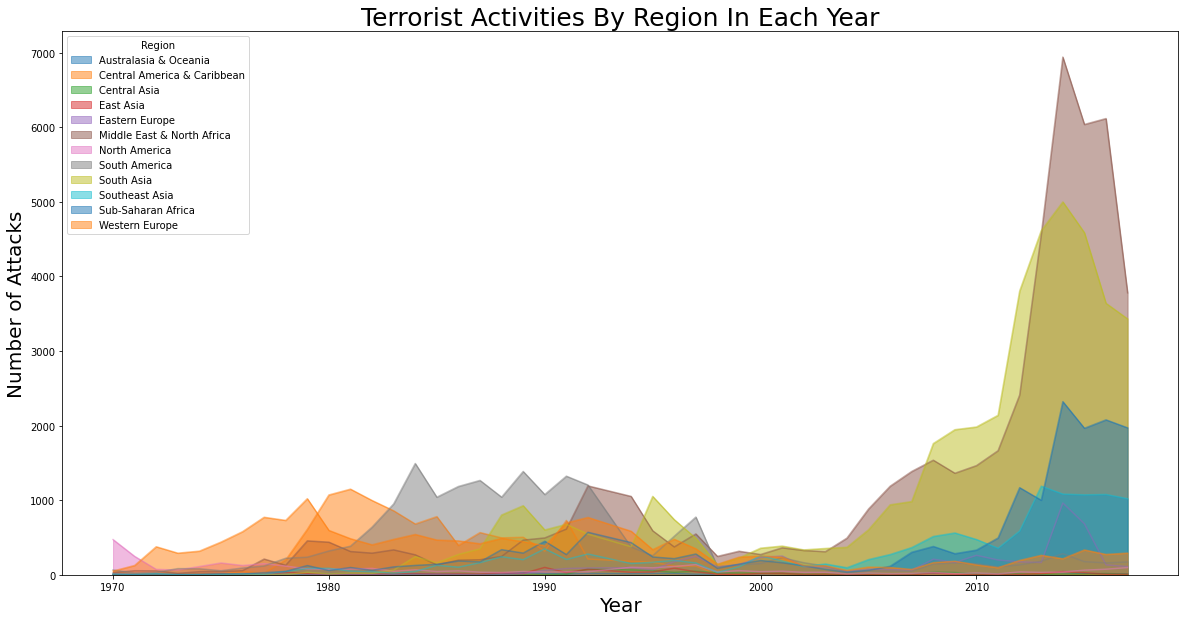

In [69]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [70]:
attack = data.Country.value_counts()[:10]
attack


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [71]:
data.Group.value_counts()[1:10]


Taliban                                             7465
Islamic State of Iraq and the Levant (ISIL)         5606
Shining Path (SL)                                   4551
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3284
New People's Army (NPA)                             2758
Irish Republican Army (IRA)                         2670
Revolutionary Armed Forces of Colombia (FARC)       2485
Boko Haram                                          2414
Name: Group, dtype: int64

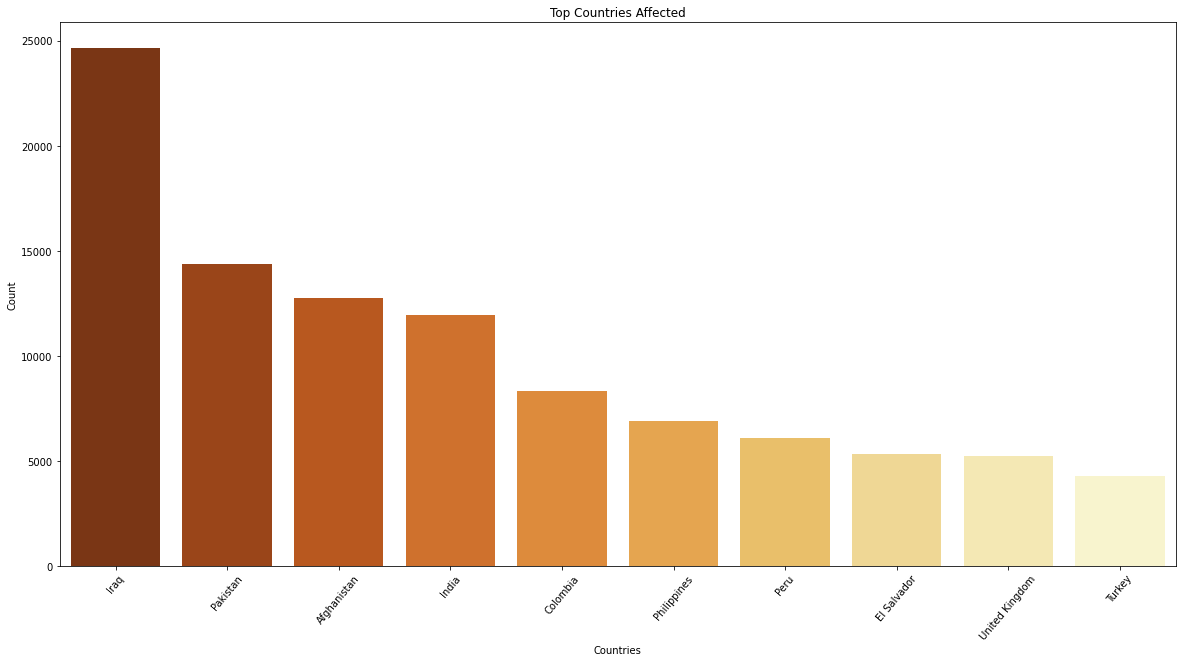

In [72]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

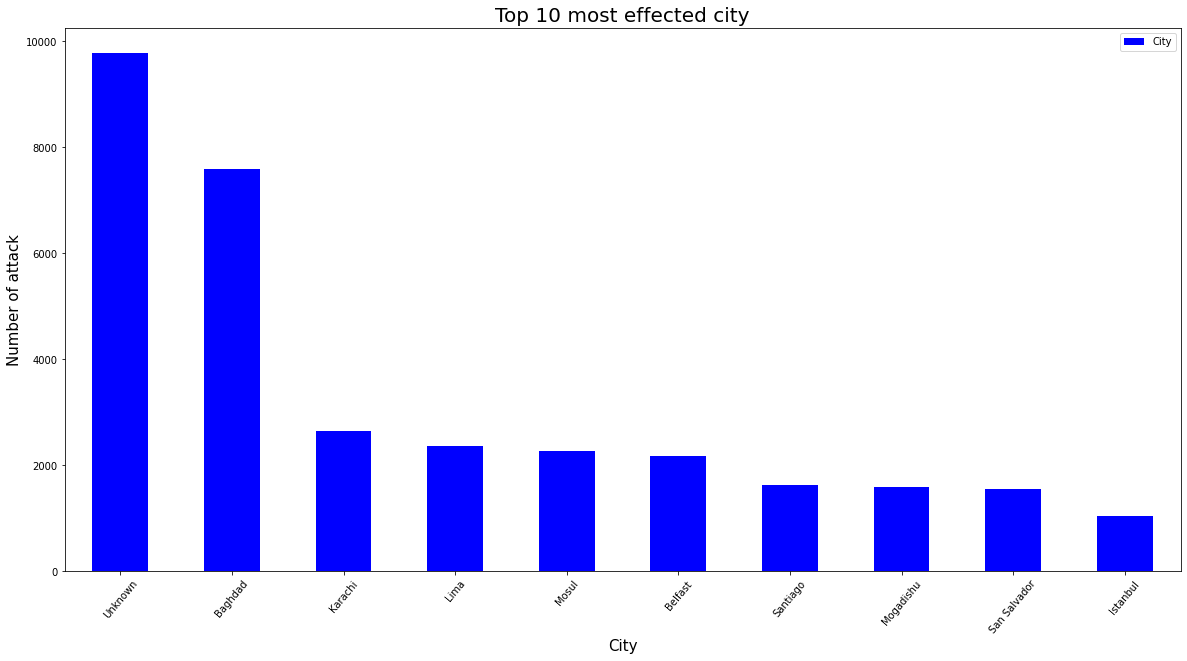

In [74]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

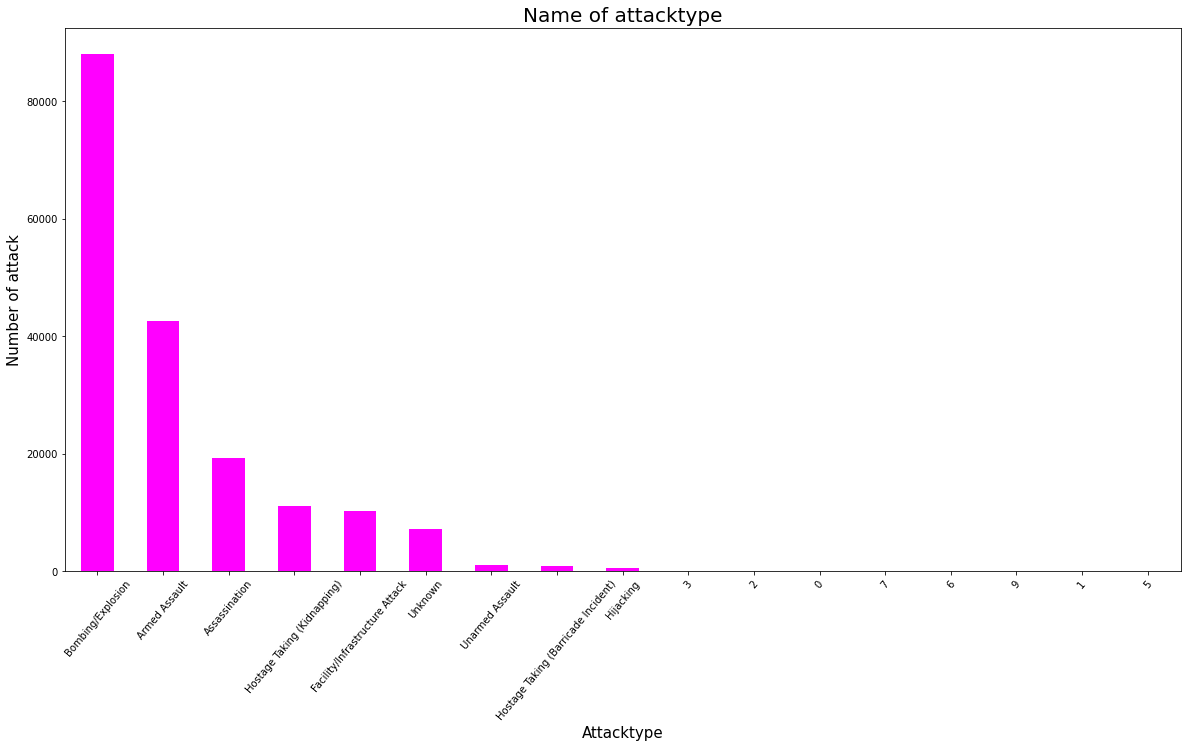

In [75]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

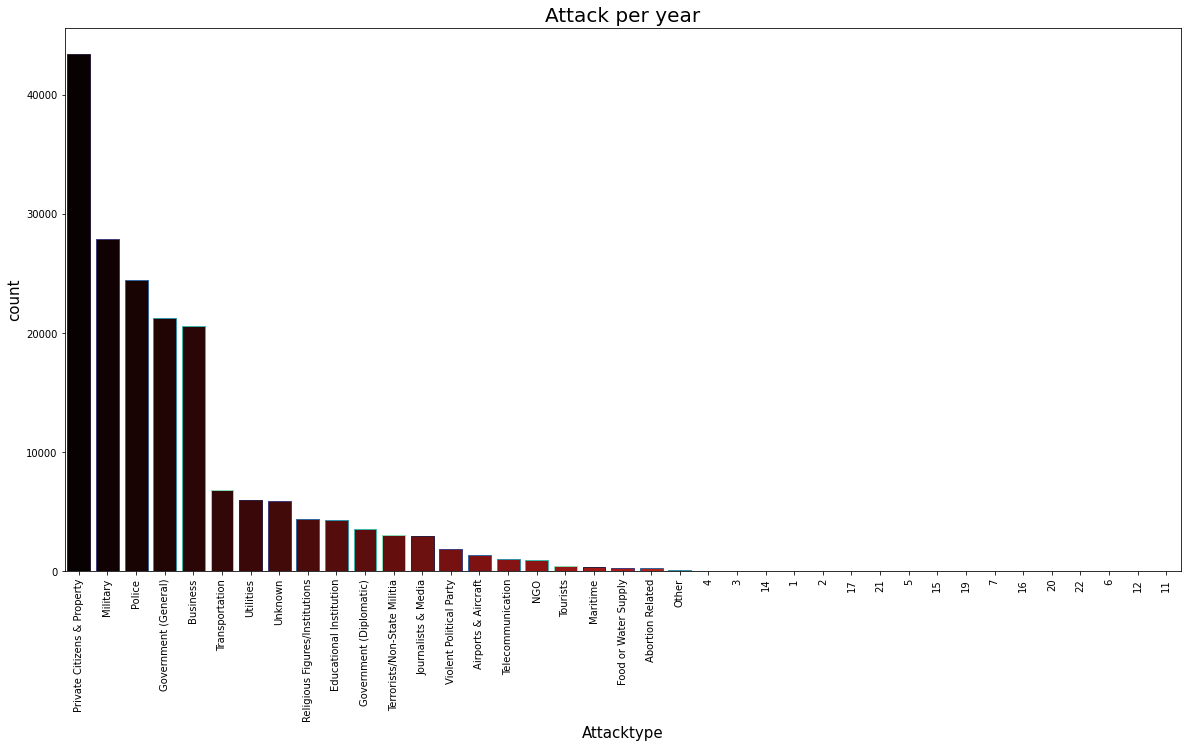

In [78]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

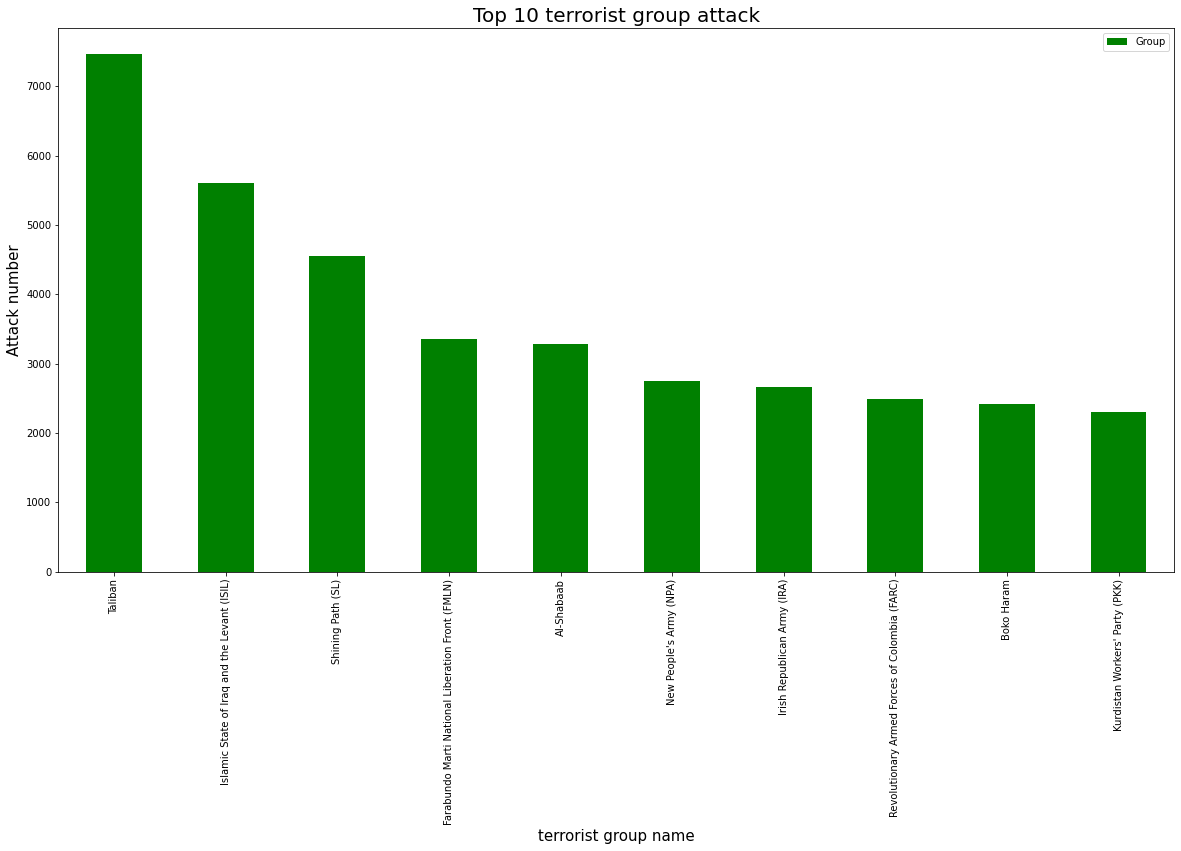

In [79]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [83]:
df=data[['Group','Country']]
df=df.groupby(['Group','Country'],axis=0).sum().drop('Unknown').reset_index().head(10)
df

,Group,Country
0,1 May,Greece
1,1004,South Sudan
2,14 K Triad,Macau
3,14 March Coalition,Lebanon
4,14th of December Command,Chile
5,15th of September Liberation Legion,Costa Rica
6,16 January Organization for the Liberation of ...,Lebanon
7,1920 Revolution Brigades,Iraq
8,19th of July Christian Resistance Brigade,Nicaragua
9,1st of May Group,Spain
